Feature Engineering is more an art than science.

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_json('../db/renthop_train.json')
df

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124000,1.0,3,92bbbf38baadfde0576fc496bd41749c,2016-04-05 03:58:33,There is 700 square feet of recently renovated...,W 171 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.8433,6824800,-73.9396,a61e21da3ba18c7a3d54cfdcc247e1f8,[https://photos.renthop.com/2/6824800_0682be16...,2800,620 W 171 Street,low
124002,1.0,2,5565db9b7cba3603834c4aa6f2950960,2016-04-02 02:25:31,"2 bedroom apartment with updated kitchen, rece...",Broadway,"[Common Outdoor Space, Cats Allowed, Dogs Allo...",40.8198,6813268,-73.9578,8f90e5e10e8a2d7cf997f016d89230eb,[https://photos.renthop.com/2/6813268_1e6fcc32...,2395,3333 Broadway,medium
124004,1.0,1,67997a128056ee1ed7d046bbb856e3c7,2016-04-26 05:42:03,No Brokers Fee * Never Lived 1 Bedroom 1 Bathr...,210 Brighton 15th St,"[Dining Room, Elevator, Pre-War, Laundry in Bu...",40.5765,6927093,-73.9554,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/6927093_93a52104...,1850,210 Brighton 15th St,medium
124008,1.0,2,3c0574a740154806c18bdf1fddd3d966,2016-04-19 02:47:33,Wonderful Bright Chelsea 2 Bedroom apartment o...,West 21st Street,"[Pre-War, Laundry in Unit, Dishwasher, No Fee,...",40.7448,6892816,-74.0017,c3cd45f4381ac371507090e9ffabea80,[https://photos.renthop.com/2/6892816_1a8d087a...,4195,350 West 21st Street,medium


# Feature Generation

## Continuous features

### Difference and Ratio

In [27]:
df["price_bed"] = df["price"]/(df["bedrooms"]+1)
df["price_bath"] = df["price"]/(df["bathrooms"]+1)
df["price_bath_bed"] = df["price"]/(df["bathrooms"] + df["bedrooms"]+1)
df["bed_bath_dif"] = df["bedrooms"]-df["bathrooms"]

df["bed_bath_per"] = df["bedrooms"]/df["bathrooms"]
df["room_sum"] = df["bedrooms"]+df["bathrooms"]
df["bed_all_per"] = df["bedrooms"]/df["room_sum"]

### Polynomial Features

$a^2, a*b, b^2, a*b^2, a^2*b$

In [28]:
df['bath_bed_mult'] = df['bathrooms'] * df['bathrooms'] * df['bedrooms']

### Statistics

In [29]:
building_stats = df.groupby("building_id", as_index=False).agg(
    manager_count=("manager_id", "count"),
    bedrooms_mean=("bedrooms", "mean"),
    bedrooms_max=("bedrooms", "max"),
    bedrooms_min=("bedrooms", "min")
    
    )
building_stats

,building_id,manager_count,bedrooms_mean,bedrooms_max,bedrooms_min
0,0,8286,1.424813,6,0
1,00005cb939f9986300d987652c933e15,1,1.000000,1,1
2,00024d77a43f0606f926e2312513845c,3,0.000000,0,0
3,000ae4b7db298401cdae2b0ba1ea8146,1,0.000000,0,0
4,0012f1955391bca600ec301035b97b65,1,3.000000,3,3
...,...,...,...,...,...
7580,ffdda5554b6aa528637e1565330ea039,1,2.000000,2,2
7581,ffde4f77049b631ee532fa9e0ebdd95d,2,1.000000,2,0
7582,ffe55387cd931c117ee1b8446f21953b,1,2.000000,2,2
7583,fff0a02ad82421c226c6d6765a0dde57,1,2.000000,2,2


## Date

### Extracting day, date, hour from dates

In [30]:
df["created"] = pd.to_datetime(df["created"])
df["created_month"] = df["created"].dt.month
df["created_day"] = df["created"].dt.day
df["created_hour"] = df["created"].dt.hour

### Extracting day of week, is_weekend or is_holiday

In [31]:
df['created_day_of_week'] = df['created'].dt.dayofweek
df['created_is_weekend'] = df['created_day_of_week'] > 4

## Geo Features

### Clustering with hexes

`h3.latlng_to_cell(lat, lng, resolution)`

In [32]:
import h3

# h3.latlng_to_cell(lat, lng, 8)
def get_hex(row):
    return h3.latlng_to_cell(row['latitude'], row['longitude'], 8)
df.apply(get_hex, axis=1)

4         882a100de9fffff
6         882a100d63fffff
9         882a100d6bfffff
10        882a100d13fffff
15        882a100d05fffff
               ...       
124000    882a100aa9fffff
124002    882a1008c1fffff
124004    882a10741bfffff
124008    882a100d25fffff
124009    882a100d61fffff
Length: 49352, dtype: object

There are 12 resolutions in the library: resolution 0 is the biggest.

More info at:<br>
https://h3geo.org/docs/core-library/restable/

### Polar coordinates

$$r = \sqrt{x^2 + y^2}$$
$$\phi = atan2(y, x)$$

### Rotational Cartesian Coordinates

$$ rot_x = x*cos\theta + y*sin\theta$$
$$ rot_y = x*sin\theta - y*cos\theta$$

In [33]:
df['rot_45_x'] = (0.707 * df['latitude']) + (0.707 * df['longitude'])
df['rot_45_y'] = (0.707 * df['latitude']) - (0.707 * df['longitude'])

### Visualize

Text(0.5, 0, 'latitude')

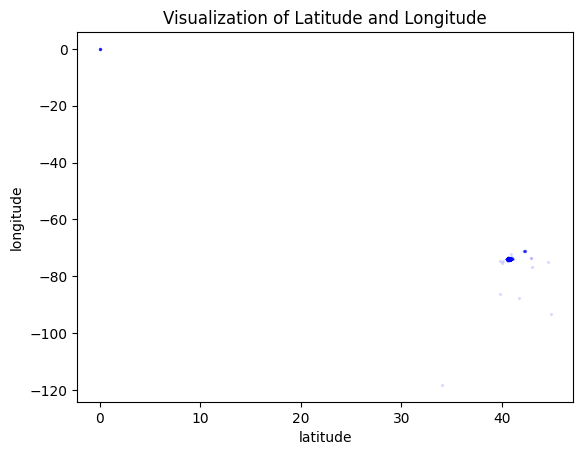

In [34]:
from matplotlib import pyplot as plt
df[['latitude','longitude']].plot.scatter(x='latitude', y='longitude', c='blue', s=2, alpha=0.1)
plt.title('Visualization of Latitude and Longitude')
plt.ylabel('longitude')
plt.xlabel('latitude')
# plt.xlim(35, 50)

<Axes: xlabel='latitude', ylabel='longitude'>

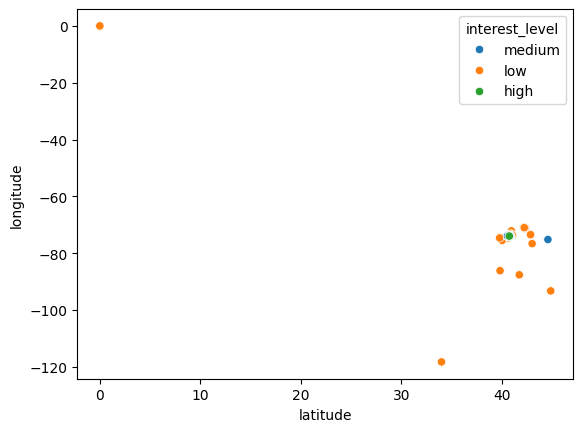

In [35]:
import seaborn as sns
sns.scatterplot(df, x='latitude', y='longitude', hue='interest_level')

Other advanced features: <br>
https://bmanikan.medium.com/feature-engineering-all-i-learned-about-geo-spatial-features-649871d16796<br>
https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization#3.-Engineered-Features---Length-of-vectors-between-districts-and-nearest-town-(Vincenty's-formulae)

## Text features

### TF-IDF

TFIDF identifies how important a term `t` in your document `d`.

$$TF(t, d) = Number\space Of\space Terms \space t\space Appears \space In \space Document\space d\div(Total\space number\space of\space terms\space t\space in\space document)$$
$$IDF(t, D) = log(Total\space number \space of\space documents\space in\space corpus\space D\div Number\space of\space documents\space containing\space term\space t)$$
$$TFIDF(t, d, D) = TF(t, d) * IDF(t, D)$$

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
result = tfidf.fit_transform(df['description'].to_list())

In [37]:
print('\nWord indexes:')
print(tfidf.vocabulary_)
print('\ntf-idf value:')
print(result)
print('\ntf-idf values in matrix form:')
print(result.toarray())


Word indexes:
{'spacious': 32117, 'bedroom': 9267, 'bathroom': 8858, 'in': 20579, 'williamsburg': 37047, 'apartment': 7094, 'features': 16937, 'renovated': 28985, 'eat': 15598, 'kitchen': 21778, 'with': 37243, 'dishwasher': 14664, 'beautiful': 9177, 'hardwood': 19639, 'floors': 17765, 'lots': 23459, 'of': 25982, 'sunlight': 33346, 'great': 19189, 'closet': 12210, 'space': 31948, 'freshly': 18304, 'painted': 26629, 'heat': 19790, 'and': 6801, 'hot': 20219, 'water': 36696, 'included': 20634, 'live': 23104, 'super': 33411, 'nearby': 25358, 'trains': 34920, 'br': 10114, 'contact': 13005, 'information': 20829, 'kenneth': 21655, 'beakexclusive': 9145, 'agentc': 6199, '064': 241, '692': 4613, '8838email': 5293, 'kagglemanager': 21569, 'renthop': 29127, 'com': 12553, 'text': 34112, 'or': 26313, 'email': 15909, 'to': 34626, 'schedule': 30442, 'private': 28058, 'viewing': 36150, 'website_redacted': 36762, 'brand': 10133, 'new': 25506, 'gut': 19418, 'true': 35209, 'bedroomfind': 9311, 'yourself'

Some other advanced feature extractions are Fasttext, GloVe or Embeddings from a language model.

# Feature Transformation

## Continuous

### Standardization

Monotonic feature transformation is critical for some algorithms and has no effect on others. This is one of the reasons for the increased popularity of decision trees and all its derivative algorithms (random forest, gradient boosting). Not everyone can or want to tinker with transformations, and these algorithms are robust to unusual distributions.<br>
Parametric methods usually require the data distribution to be at least symmetric and unimodal, which is not always the case.<br>
A simple example: suppose that the task is to predict the cost of an apartment from two variables — the distance from city center and the number of rooms. The number of rooms rarely exceeds 5 whereas the distance from city center can easily be in the thousands of meters.

The simplest transformation is Standard Scaling (or Z-score normalization):

$$\large z= \frac{x-\mu}{\sigma}$$

In [38]:
from sklearn.preprocessing import StandardScaler
StandardScaler().fit_transform(pd.DataFrame(df['price']))

array([[-0.06481158],
       [-0.0013674 ],
       [-0.01518917],
       ...,
       [-0.08973608],
       [ 0.01653292],
       [ 0.02038488]], shape=(49352, 1))

Another fairly popular option is MinMax Scaling, which brings all the points within a predetermined interval (typically (0, 1)).

$$\large X_{norm}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

In [39]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(pd.DataFrame(df['price']))


array([[0.00052495],
       [0.00083676],
       [0.00076883],
       ...,
       [0.00040245],
       [0.00092473],
       [0.00094366]], shape=(49352, 1))

### Discretisation

You can also discretitize numerical features, which means turning them into categorical variables. This is often useful for linear models like Logistic Regression.

<Axes: >

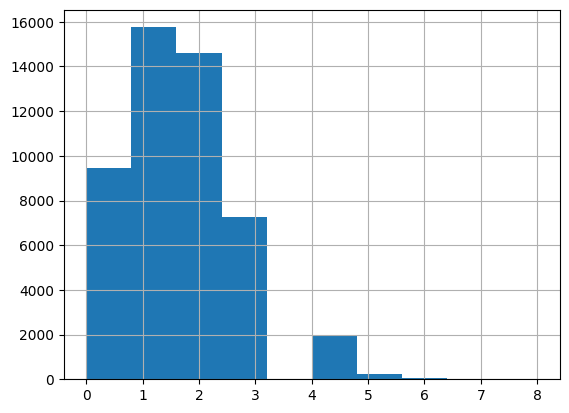

In [40]:
df['bedrooms'].hist()

In [41]:
bins = [0, 1, 3, 5, float('inf')]
labels = [1, 2, 3, 4]

pd.cut(df['bedrooms'], bins=bins, labels=labels, right=False)

4         2
6         2
9         2
10        3
15        1
         ..
124000    3
124002    2
124004    2
124008    2
124009    3
Name: bedrooms, Length: 49352, dtype: category
Categories (4, int64): [1 < 2 < 3 < 4]

Or use other advanced methods

In [42]:
from sklearn.preprocessing import KBinsDiscretizer
KBinsDiscretizer(
    n_bins=3, encode='ordinal', strategy='uniform'
).fit_transform(pd.DataFrame(df['bedrooms']))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]], shape=(49352, 1))

## Categorical Features Encoding

### One-Hot Encoding

The OneHotEncoder() replaces categorical variables by a set of binary variables representing each one of the unique categories in the variable.

The encoder has the option to create k or k-1 binary variables, where k is the number of unique categories.

In [43]:
from feature_engine.encoding import OneHotEncoder
enc = OneHotEncoder(drop_last=True)
print(enc.fit_transform(pd.DataFrame(df['interest_level'])))

ModuleNotFoundError: No module named 'feature_engine'

### Ordinal Encoder

The OrdinalEncoder() replaces categories by ordinal numbers (0, 1, 2, 3, etc). The numbers can be ordered based on the mean of the target per category, or assigned arbitrarily.

In [ ]:
from feature_engine.encoding import OrdinalEncoder
enc = OrdinalEncoder(encoding_method='arbitrary')
print(enc.fit_transform(pd.DataFrame(df['interest_level'])))

        interest_level
4                    0
6                    1
9                    0
10                   0
15                   1
...                ...
124000               1
124002               0
124004               0
124008               0
124009               2

[49352 rows x 1 columns]


Or you can use mapping in pandas

In [ ]:
df['interest_level'].map({'high': 1, 'medium': 2, 'low':3})

4         2
6         3
9         2
10        2
15        3
         ..
124000    3
124002    2
124004    2
124008    2
124009    1
Name: interest_level, Length: 49352, dtype: int64

### Other advanced encodings are Mean Target Encoding and Weight Of Evidence Encoding

It uses target variable to calculate statistics, thus, it is dangerous. Use it only if you know what you are doing.

In [ ]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()
    ], axis=1)
    
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE']).reset_index(drop=True)
    
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df

Calculates the Weight of Evidence (WoE) and Information Value (IV) for a discrete (categorical) unordered variable in binary classification tasks.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the dataset where the discrete variable is located.
    discrete_variable_name : str
        The name of the column in the DataFrame that contains the discrete variable for which WoE and IV are to be calculated.
    good_bad_variable_df : pandas.Series or pandas.DataFrame
        A Series or single-column DataFrame representing the binary target variable (e.g., 'good' or 'bad' outcome). Must have the same length as `df`.

    Returns:
    -------
    pandas.DataFrame
        A DataFrame that includes the following columns:
        - `discrete_variable_name`: The unique categories of the discrete variable.
        - `n_obs`: The number of observations in each category.
        - `prop_good`: Proportion of 'good' outcomes in each category.
        - `prop_n_obs`: Proportion of total observations in each category.
        - `n_good`: Number of 'good' outcomes in each category.
        - `n_bad`: Number of 'bad' outcomes in each category.
        - `prop_n_good`: Proportion of total 'good' outcomes in each category.
        - `prop_n_bad`: Proportion of total 'bad' outcomes in each category.
        - `WoE`: Weight of Evidence for each category.
        - `diff_prop_good`: Absolute difference in `prop_good` between consecutive categories.
        - `diff_WoE`: Absolute difference in `WoE` between consecutive categories.
        - `IV`: Information Value for the variable (a single value).

    The WoE quantifies the strength of a variable's association with the target. The IV helps assess the predictive power of the variable.

    Notes:
    ------
    - WoE is a logarithmic measure of the difference between the proportion of 'good' and 'bad' outcomes for each category.
    - IV is the sum of weighted WoE values for all categories, where higher IV values indicate greater predictive power:
        - IV < 0.02: Very weak predictor.
        - 0.02 ≤ IV < 0.1: Weak predictor.
        - 0.1 ≤ IV < 0.3: Medium predictor.
        - 0.3 ≤ IV < 0.5: Strong predictor.
        - IV ≥ 0.5: Very strong predictor.

In [ ]:
df = pd.DataFrame({
    'category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'target': [1, 0, 0, 1, 0, 0, 1, 1, 0, 1]
})
result = woe_discrete(df, 'category', df['target'])
result

,category,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,B,3,0.333333,0.3,1.0,2.0,0.2,0.4,-0.693147,NaN,NaN,0.716704
1,C,3,0.333333,0.3,1.0,2.0,0.2,0.4,-0.693147,0.000000,0.000000,0.716704
2,A,4,0.750000,0.4,3.0,1.0,0.6,0.2,1.098612,0.416667,1.791759,0.716704
